<a href="https://colab.research.google.com/github/srikarpadiyar/hello-world/blob/main/NLP_Project1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import numpy as np
import re, string
import seaborn as sns
import matplotlib.pyplot as plt


#for text pre-processing
import re, string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')

from nltk.corpus import stopwords




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [4]:
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

In [5]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/blogtext.csv')
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [7]:
df['topic'].unique()

array(['Student', 'InvestmentBanking', 'indUnk', 'Non-Profit', 'Banking',
       'Education', 'Engineering', 'Science', 'Communications-Media',
       'BusinessServices', 'Sports-Recreation', 'Arts', 'Internet',
       'Museums-Libraries', 'Accounting', 'Technology', 'Law',
       'Consulting', 'Automotive', 'Religion', 'Fashion', 'Publishing',
       'Marketing', 'LawEnforcement-Security', 'HumanResources',
       'Telecommunications', 'Military', 'Government', 'Transportation',
       'Architecture', 'Advertising', 'Agriculture', 'Biotech',
       'RealEstate', 'Manufacturing', 'Construction', 'Chemicals',
       'Maritime', 'Tourism', 'Environment'], dtype=object)

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


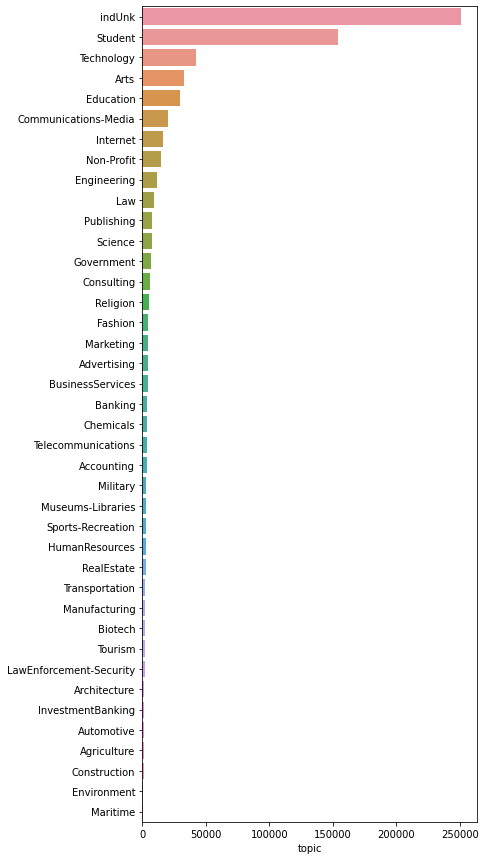

In [8]:
topics=df['topic'].value_counts()
print(topics)
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(topics, topics.index, orient = 'h')

In [9]:
df['topic'].isna().sum()

0

In [10]:
df['text'].isna().sum()

0

In [11]:
# removing punctuations, converting to lower case 
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text



In [12]:
 
# remove stopwords
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [13]:
# lemmatizer
wl = WordNetLemmatizer()
 
# map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize sentences
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) 
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(a)

In [14]:
def finalpreprocess1(string):
    # return lemmatizer(stopword(preprocess(string)))
    return preprocess(string)



In [15]:
def finalpreprocess2(string):
    # return lemmatizer(stopword(preprocess(string)))
    return stopword(string)


In [16]:
def finalpreprocess3(string):
    # return lemmatizer(stopword(preprocess(string)))
    return lemmatizer(string)

In [17]:
df['clean_text'] = df['text'].apply(lambda x: finalpreprocess1(x))
df.head()

,id,gender,age,topic,sign,date,text,clean_text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info has been found pages and mb of pdf files ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,these are the team members drewes van der laag...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je ei...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo s toolbar i can now capture th...


In [ ]:
df['clean_text'] = df['clean_text'].apply(lambda x: finalpreprocess2(x))

In [ ]:
df['clean_text'] = df['clean_text'].apply(lambda x: finalpreprocess3(x))

In [18]:
df['text'][5]

"             I had an interesting conversation with my Dad this morning.  We were talking about where Koreans put their money.  Invariably, they have a lot of real estate and cash.  (Cash would include short term investments under one year as well as savings accounts.)  The reason?  Real estate makes money here.  A lot of money.  I've seen surveys of Seoul real estate rising about 10-15% PER YEAR for long stretches, even after taking into account the 1997 Crisis (referred to as the IMF crisis here, although it was the IMF that bailed Korea out).  Compare that to Korean corporate bonds which fell 90-99% in 1997 and only modestly recovered, and a local stock market (represented by KOSPI, or their version of the Dow Jones Index) that has not gone appreciably above its 1980s high of 1,000 points (it is now about 800 points, see  urlLink link ) and you can see why real estate makes sense here.  But back to the conversation...I noted that here a 'real big' or 'elite' real estate investor ha

In [19]:
df['clean_text'][5]

'i had an interesting conversation with my dad this morning we were talking about where koreans put their money invariably they have a lot of real estate and cash cash would include short term investments under one year as well as savings accounts the reason real estate makes money here a lot of money i ve seen surveys of seoul real estate rising about per year for long stretches even after taking into account the crisis referred to as the imf crisis here although it was the imf that bailed korea out compare that to korean corporate bonds which fell in and only modestly recovered and a local stock market represented by kospi or their version of the dow jones index that has not gone appreciably above its s high of points it is now about points see urllink link and you can see why real estate makes sense here but back to the conversation i noted that here a real big or elite real estate investor has over billion won about usd see urllink converter in properties dad seemed a little flabbe

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"],df["topic"],test_size=0.2,shuffle=True)

In [21]:
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [1]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

def fit(self, X, y):
        return self

def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']]

model = Word2Vec(df['clean_text_tok'],min_count=1)     

w2v = dict(zip(model.wv.index2word, model.wv.syn0)) 

modelw = MeanEmbeddingVectorizer(w2v)

# convert to numerical data 
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_test_tok)

NameError: ignored

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model
#Predict y value for test dataset
y_predict = lr_w2v.predict(X_test_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

In [ ]:
def data_to_words(comp):
    
    words = RegexpTokenizer('\w+').tokenize(comp)
    words = [re.sub(r'([xx]+)|([XX]+)|(\d+)', '', w).lower() for w in words]
    words = list(filter(lambda a: a != '', words))
    
    return words

In [ ]:
df.shape

(681284, 7)

In [ ]:
all_words = list()
for comp in df['text']:
    for w in data_to_words(comp):
        all_words.append(w)